#### assumptions in multilinear regression 
1. linearity: the relationship between teh predictors and the response is linear
2. Independence: obsevations are independent of each other
3. homoscedasticity: the residuals(y y_hat) exhibit constant variance at all levels of the predictor
4. normal distribution of errors: te residuals of the model are normally distributed
5. no multicollinearity: the independent variables should not be too highly correlatred with each other

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [2]:
cars = pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


#### Description of columns
- MPG: milege of the car(mile per gallon) (this is Y-coulumn to be predicted)
-  HP: horse power of the car(X1 column)
-  VOL: volume of the car(size) (X2 column)
-  SP : top dpeed of the car(miles per hour) (X3 column)
-  WT: weight of the car(pounds)(X4 column)

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [4]:
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

#### oservations
- there are no missing values
- 81 observations 
- data types of the column are also relevant and valid

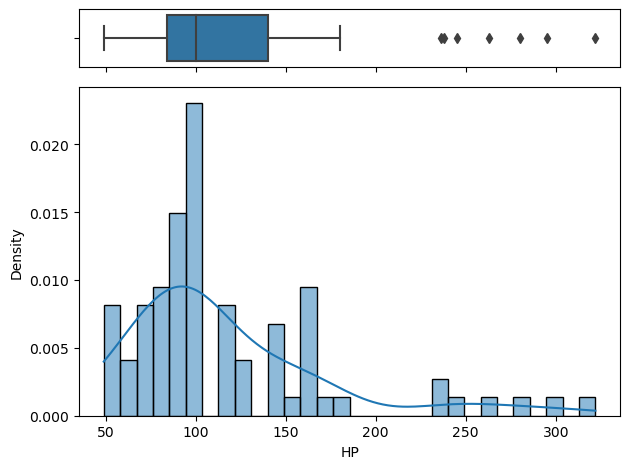

In [6]:
#create a figure with two subplots(one above the other)
fig,(ax_box,ax_hist)=plt.subplots(2,sharex=True,gridspec_kw={"height_ratios":(.15,.85)})
#creating a boxplot
sns.boxplot(data=cars,x="HP",ax=ax_box,orient='h')
ax_box.set(xlabel='')#remove x label for the boxplot
#creating a histogram in the same x-axis
sns.histplot(data=cars,x='HP',ax=ax_hist,bins=30,kde=True,stat="density")
ax_hist.set(ylabel='Density')
#Adjust layout
plt.tight_layout()
plt.show()

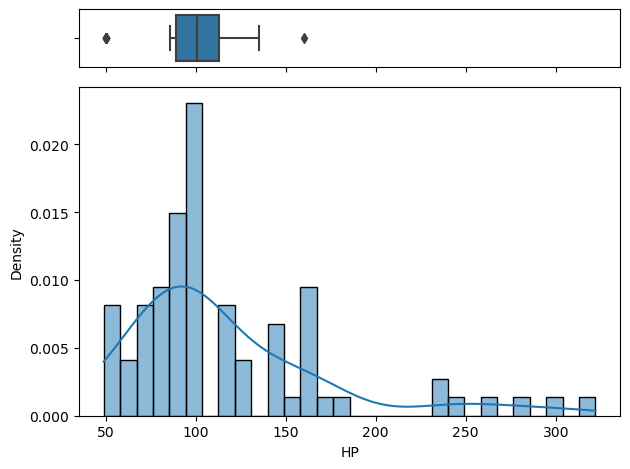

In [8]:
#create a figure with two subplots(one above the other)
fig,(ax_box,ax_hist)=plt.subplots(2,sharex=True,gridspec_kw={"height_ratios":(.15,.85)})
#creating a boxplot
sns.boxplot(data=cars,x="VOL",ax=ax_box,orient='h')
ax_box.set(xlabel='')#remove x label for the boxplot
#creating a histogram in the same x-axis
sns.histplot(data=cars,x='HP',ax=ax_hist,bins=30,kde=True,stat="density")
ax_hist.set(ylabel='Density')
#Adjust layout
plt.tight_layout()
plt.show()

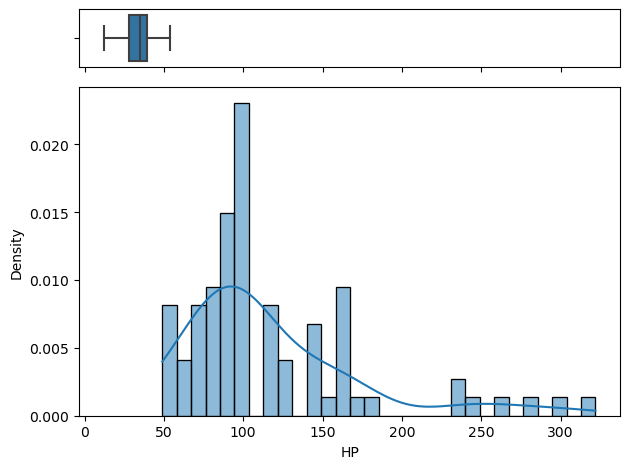

In [9]:
#create a figure with two subplots(one above the other)
fig,(ax_box,ax_hist)=plt.subplots(2,sharex=True,gridspec_kw={"height_ratios":(.15,.85)})
#creating a boxplot
sns.boxplot(data=cars,x="MPG",ax=ax_box,orient='h')
ax_box.set(xlabel='')#remove x label for the boxplot
#creating a histogram in the same x-axis
sns.histplot(data=cars,x='HP',ax=ax_hist,bins=30,kde=True,stat="density")
ax_hist.set(ylabel='Density')
#Adjust layout
plt.tight_layout()
plt.show()

## observations from boxplot and histograms
- There are some extreme values(outliers) observed in towards the right tail of SP and HP distributions.
- In VOL and WT columns, a few outliers are observed in both tails of their distributions.
- The extreme values of cars data may have come from the specially designed nature of cars.
- Ast this is multi_dimensionaldata,the outliers with respect to spatial dimensions may have to be considered while building the regression model

In [10]:
#checking for duplicated rows
cars[cars.duplicated()]

,HP,MPG,VOL,SP,WT


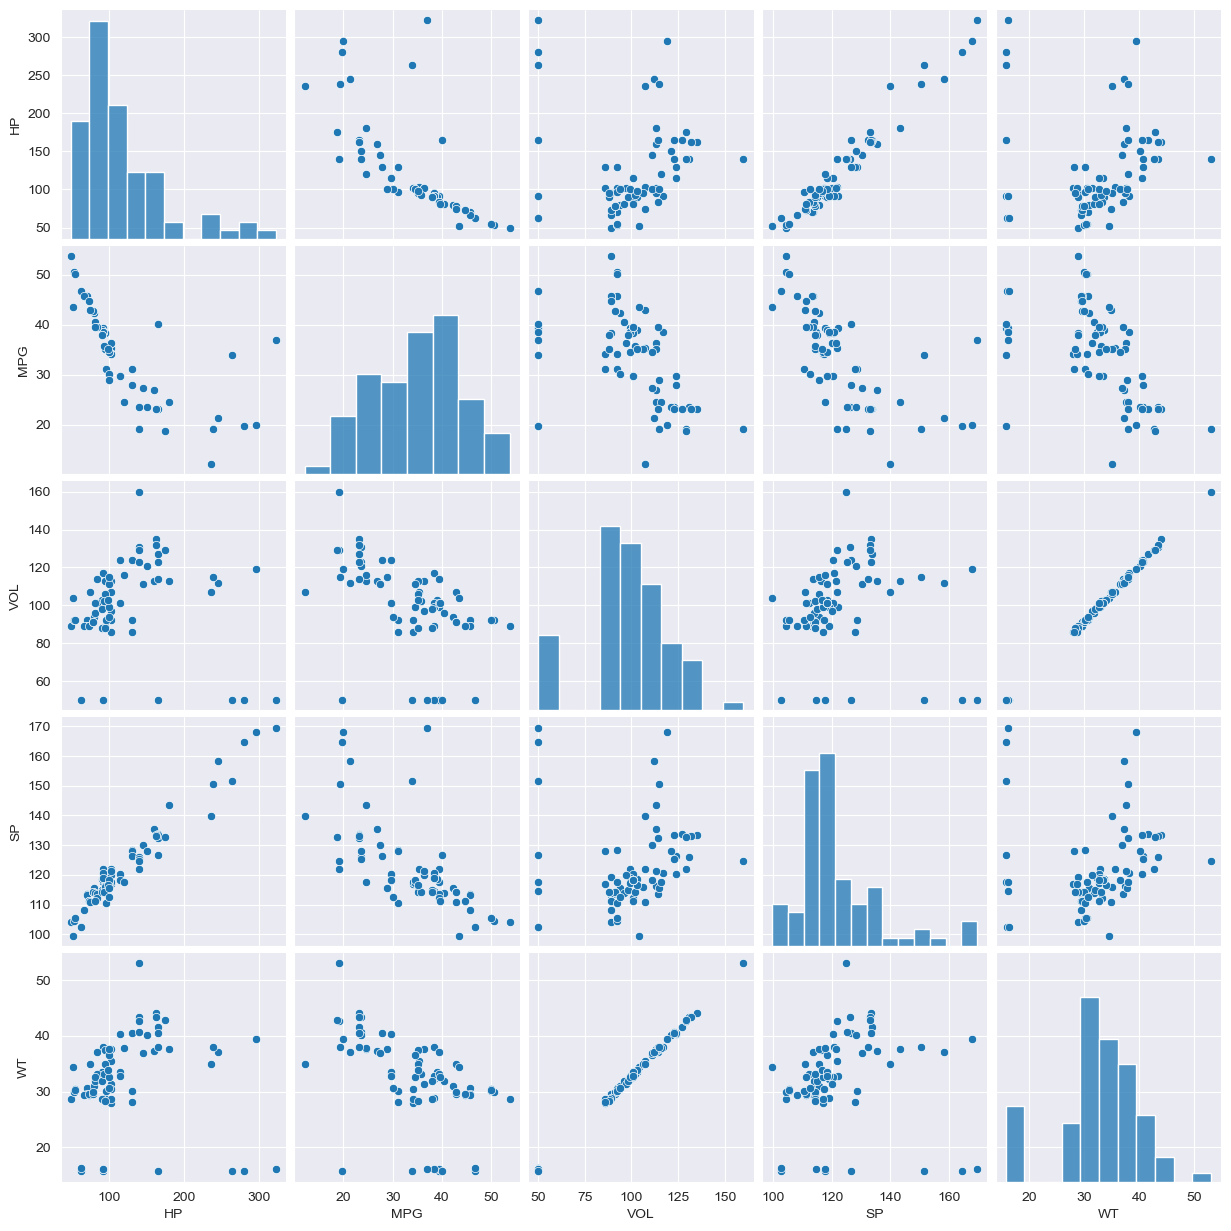

In [11]:
#pair plots and correlation coeeficients
#pair plot
sns.set_style(style='darkgrid')
sns.pairplot(cars)

In [12]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


## observations
- b/w x,y all the x variables are showing moderate to high correlation strengths,highest being b/w HP and MPG
- Therefore this dataset qualifies for building a multiple linear regression modelto predict MPG
- Among x columns (x1,x2,x3,x4),some very high correlation strengths are observed b/w SP vs HP ,VOL vs WT
- The high correlation among x columns is not desirable as it might lead to multicollinearity pblm

In [13]:
#Preapring a preliminary model considering all X columns
# build model
model=smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           1.54e-23
Time:                        11:32:28   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""